In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb

In [2]:
# Charge le premier dataset (modèle de création)
df_train = pd.read_csv("Datasets/Spam detection - For model creation.csv", sep=";")

# Préparation des données pour le premier dataset
X_train_full = df_train.drop('GOAL-Spam', axis=1)  # Caractéristiques
y_train_full = df_train['GOAL-Spam']  # Cible (Yes ou No)

# Conversion des étiquettes en format numérique
y_train_full = y_train_full.map({'No': 0, 'Yes': 1})

# Charge le second dataset (pour prédiction)
df_pred = pd.read_csv("Datasets/Spam detection - For prediction.csv", sep=",")

X_pred = df_pred[X_train_full.columns]  # Caractéristiques du dataset de prédiction

In [3]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_pred_scaled = scaler.transform(X_pred)  # Normalisation du dataset de prédiction

# Liste des modèles à tester
models = {
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

Entraînement du modèle : Logistic Regression
--- Logistic Regression ---
Précision (train): 0.9571 | Précision (test): 0.9465
Rappel (train): 0.9042 | Rappel (test): 0.8984
F1-Score (train): 0.9299 | F1-Score (test): 0.9218
Accuracy (train): 0.9419 | Accuracy (test): 0.9345


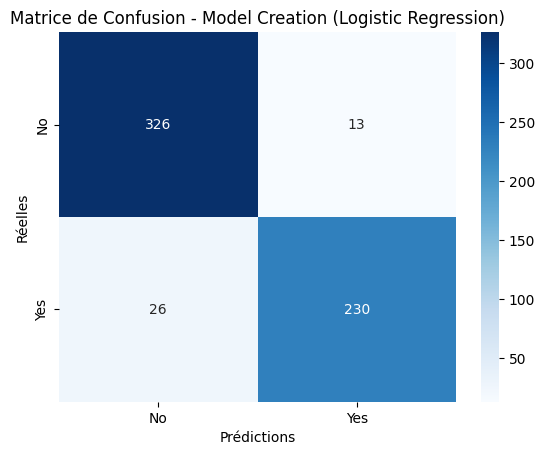

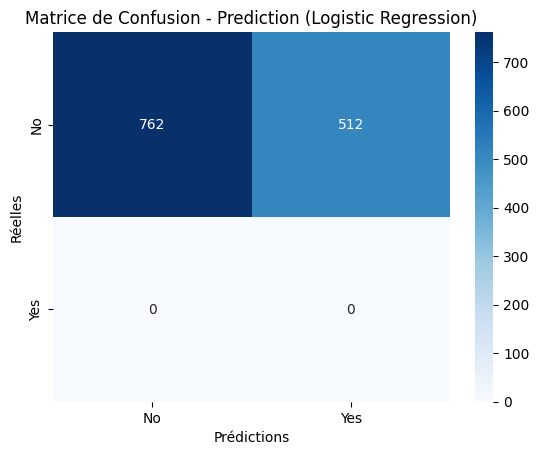



Entraînement du modèle : Neural Network
--- Neural Network ---
Précision (train): 0.9891 | Précision (test): 0.9370
Rappel (train): 0.9822 | Rappel (test): 0.9297
F1-Score (train): 0.9856 | F1-Score (test): 0.9333
Accuracy (train): 0.9878 | Accuracy (test): 0.9429


c:\Users\benja\Desktop\Pro\EFREI\Machine Learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


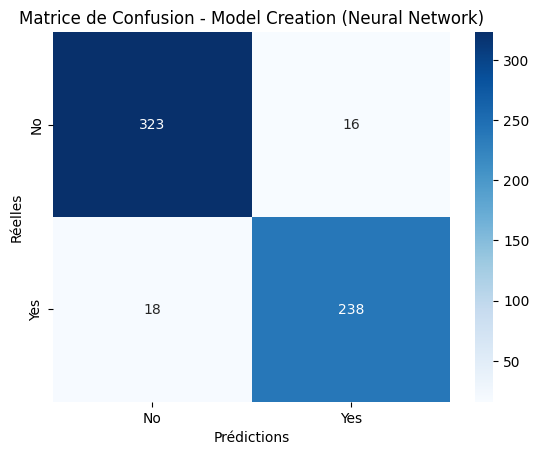

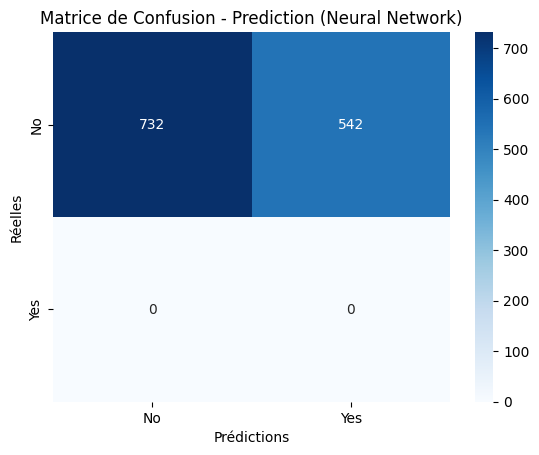



Entraînement du modèle : SVM
--- SVM ---
Précision (train): 0.9676 | Précision (test): 0.9388
Rappel (train): 0.9160 | Rappel (test): 0.8984
F1-Score (train): 0.9411 | F1-Score (test): 0.9182
Accuracy (train): 0.9512 | Accuracy (test): 0.9311


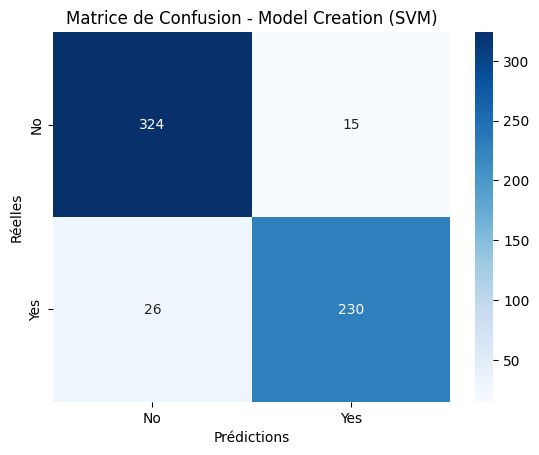

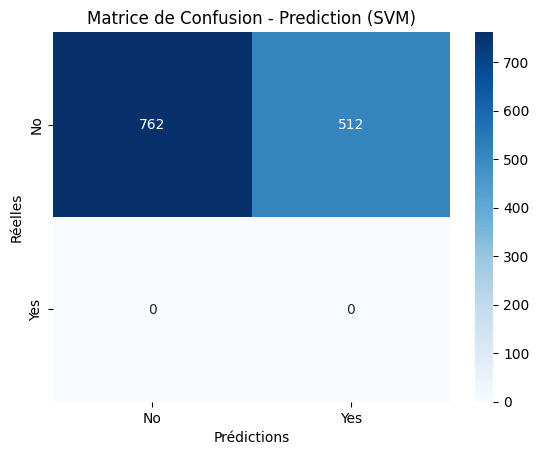



Entraînement du modèle : Gradient Boosting
--- Gradient Boosting ---
Précision (train): 0.9784 | Précision (test): 0.9708
Rappel (train): 0.9417 | Rappel (test): 0.9102
F1-Score (train): 0.9597 | F1-Score (test): 0.9395
Accuracy (train): 0.9663 | Accuracy (test): 0.9496


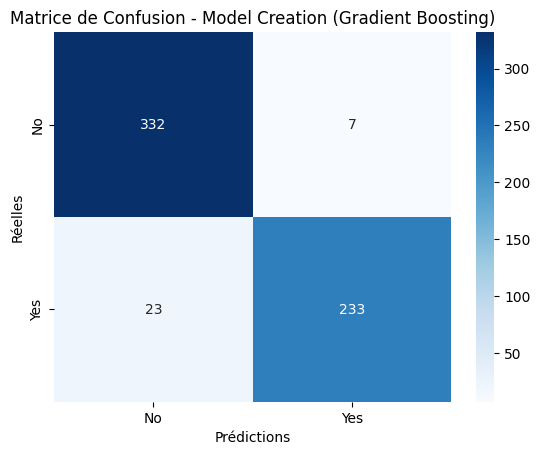

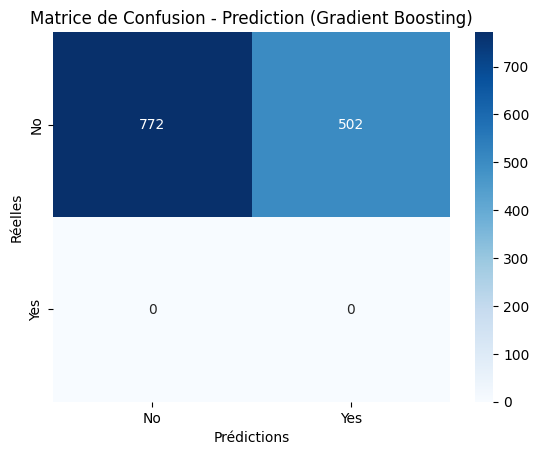



Entraînement du modèle : Decision Tree
--- Decision Tree ---
Précision (train): 0.9990 | Précision (test): 0.9023
Rappel (train): 0.9941 | Rappel (test): 0.9023
F1-Score (train): 0.9965 | F1-Score (test): 0.9023
Accuracy (train): 0.9971 | Accuracy (test): 0.9160


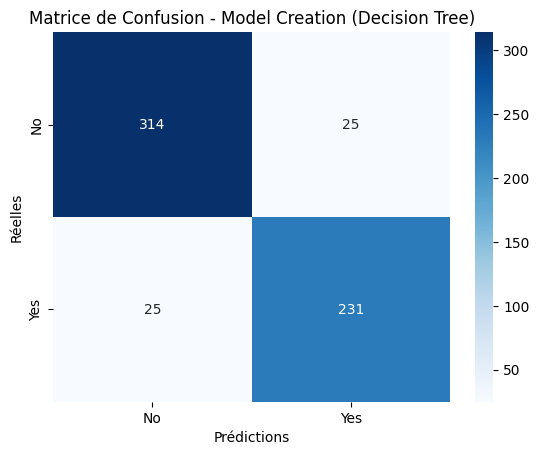

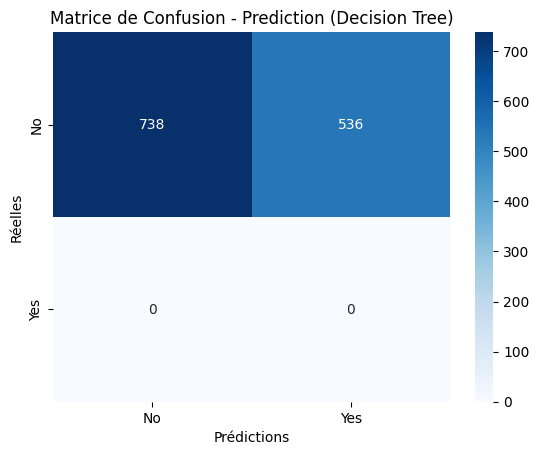



Entraînement du modèle : Random Forest
--- Random Forest ---
Précision (train): 0.9990 | Précision (test): 0.9672
Rappel (train): 0.9941 | Rappel (test): 0.9219
F1-Score (train): 0.9965 | F1-Score (test): 0.9440
Accuracy (train): 0.9971 | Accuracy (test): 0.9529


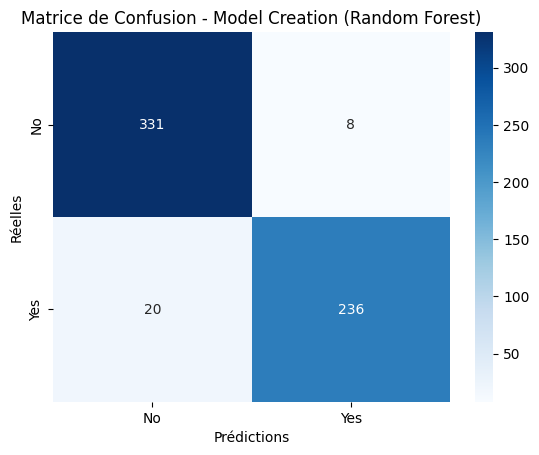

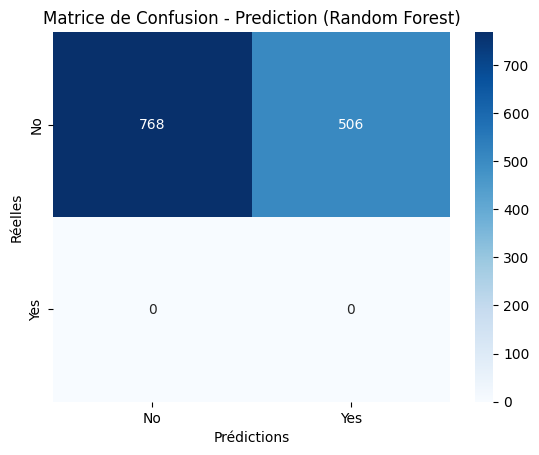



Entraînement du modèle : XGBoost
--- XGBoost ---
Précision (train): 0.9960 | Précision (test): 0.9597
Rappel (train): 0.9931 | Rappel (test): 0.9297
F1-Score (train): 0.9946 | F1-Score (test): 0.9444
Accuracy (train): 0.9954 | Accuracy (test): 0.9529


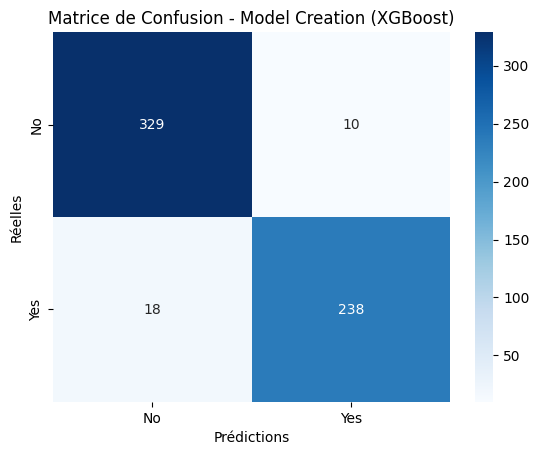

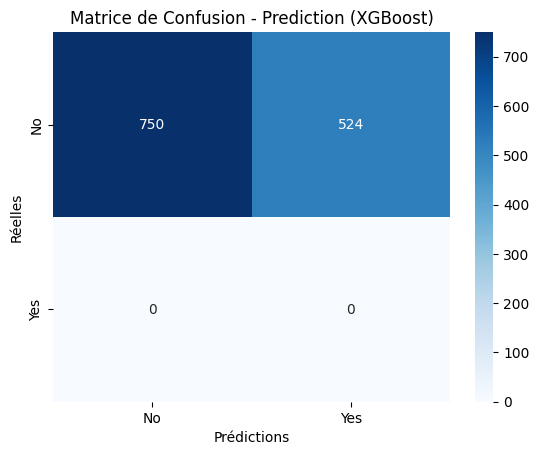

In [4]:
# Construction et évaluation des modèles
for model_name, model in models.items():
    print(f"Entraînement du modèle : {model_name}")
    
    # Entrainement du modèle
    model.fit(X_train_scaled, y_train)
    
    # Prédictions sur les données d'entrainement, de test et de prédiction
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_pred_pred = model.predict(X_pred_scaled)  # Prédictions sur le second dataset
    
    # Calcul des métriques pour train et test
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)

    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Affichage des résultats
    print(f"--- {model_name} ---")
    print(f"Précision (train): {precision_train:.4f} | Précision (test): {precision_test:.4f}")
    print(f"Rappel (train): {recall_train:.4f} | Rappel (test): {recall_test:.4f}")
    print(f"F1-Score (train): {f1_train:.4f} | F1-Score (test): {f1_test:.4f}")
    print(f"Accuracy (train): {accuracy_train:.4f} | Accuracy (test): {accuracy_test:.4f}")

    # Matrice de confusion pour les données de test
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Matrice de Confusion - Model Creation ({model_name})')
    plt.xlabel('Prédictions')
    plt.ylabel('Réelles')
    plt.show()

    # Matrice de confusion pour les données de prédiction
    unique_classes = sorted(y_train_full.unique())  # Identifier les classes cibles
    cm_pred = confusion_matrix([0]*len(y_pred_pred), y_pred_pred, labels=unique_classes)
    sns.heatmap(cm_pred, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Matrice de Confusion - Prediction ({model_name})')
    plt.xlabel('Prédictions')
    plt.ylabel('Réelles')
    plt.show()

    print("\n")